In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
df = pd.read_csv(r"C:\Users\james\Downloads\diss\data\SBERT\KMeans_clustered_descriptions.csv")

In [5]:
# Basic text preprocessing function
def preprocess(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return tokens

In [6]:
# Create a token column
df["tokens"] = df["cleaned_desc"].apply(preprocess)

In [7]:
# Function to get top N words per cluster
def get_top_words(df, cluster_col, tokens_col, top_n=20):
    cluster_words = {}
    for cluster_id in sorted(df[cluster_col].dropna().unique()):
        all_words = [word for tokens in df[df[cluster_col] == cluster_id][tokens_col] for word in tokens]
        word_freq = Counter(all_words).most_common(top_n)
        cluster_words[cluster_id] = word_freq
    return cluster_words

In [8]:
# Get top 20 words per cluster
top_words = get_top_words(df, "kmeans_cluster", "tokens", top_n=20)

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


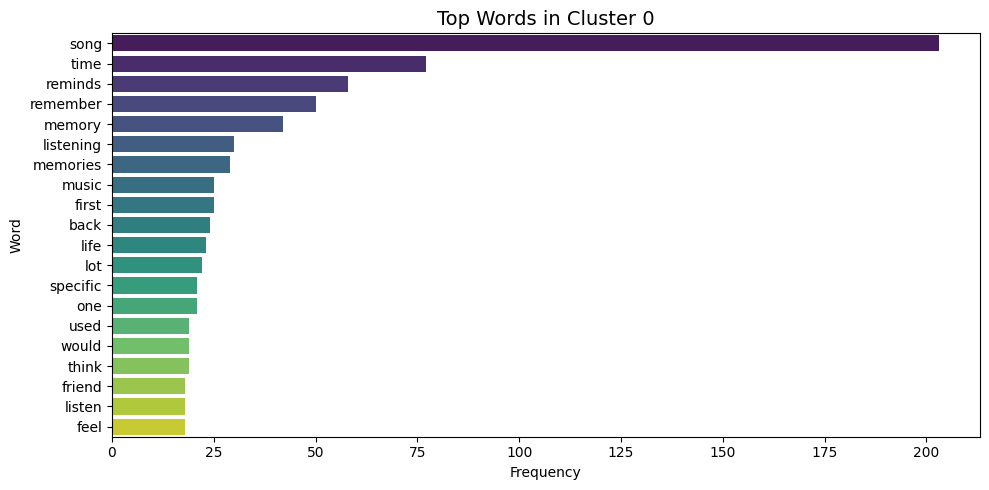

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


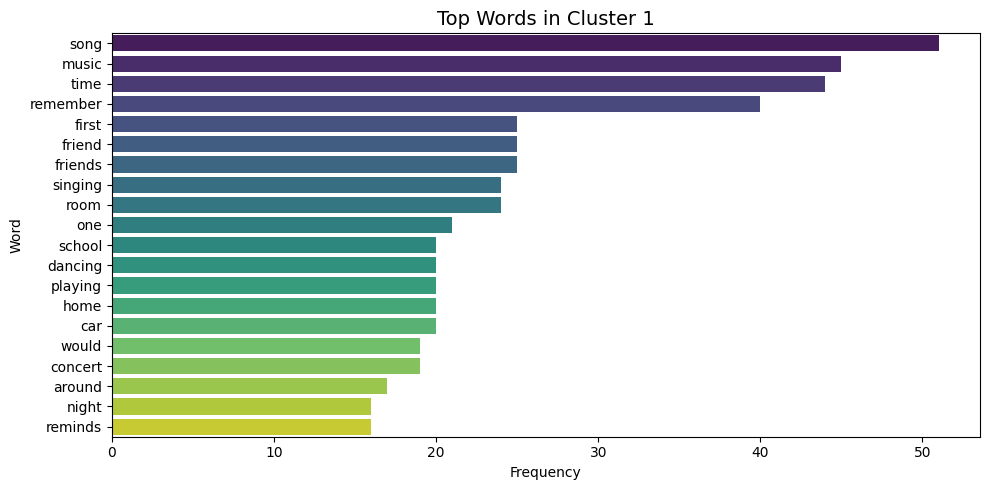

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


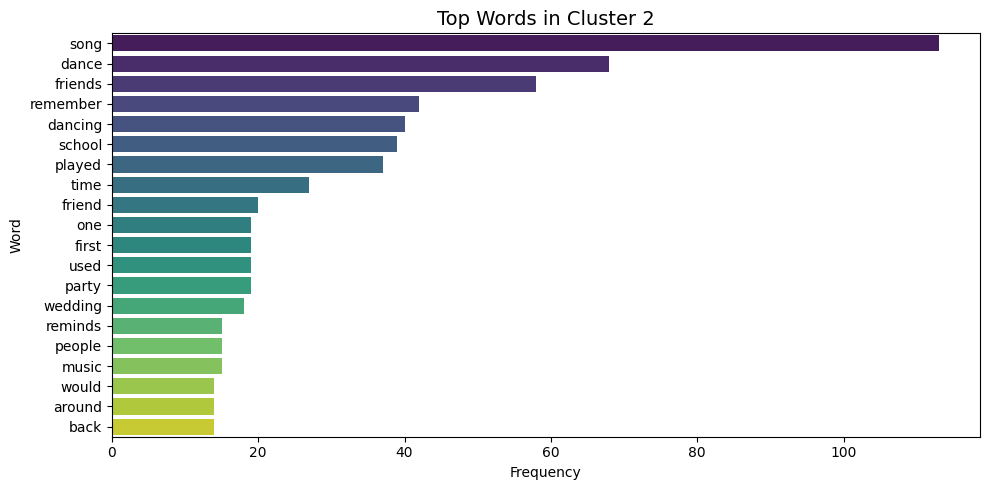

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


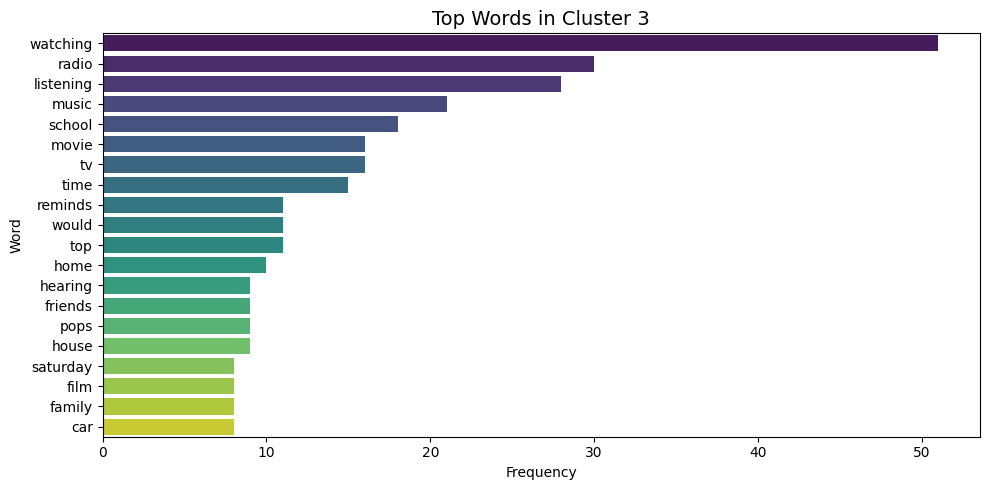

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


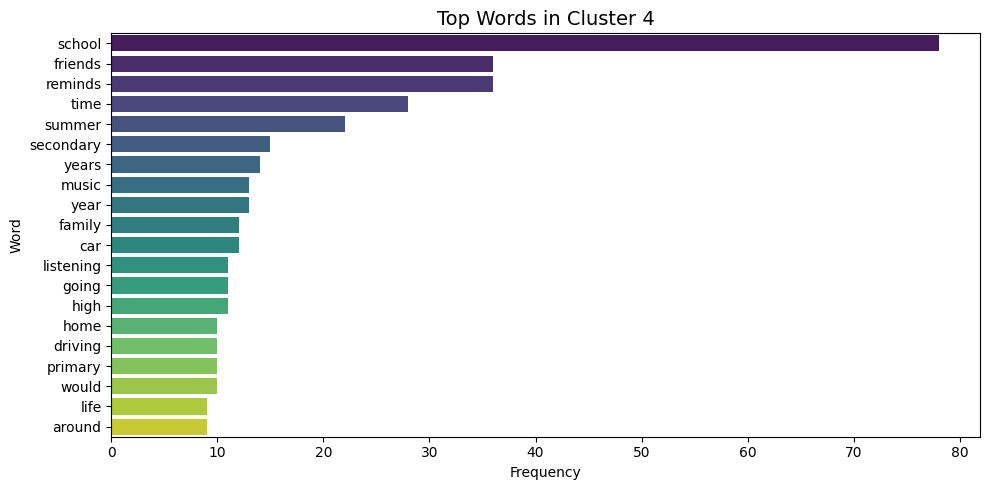

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


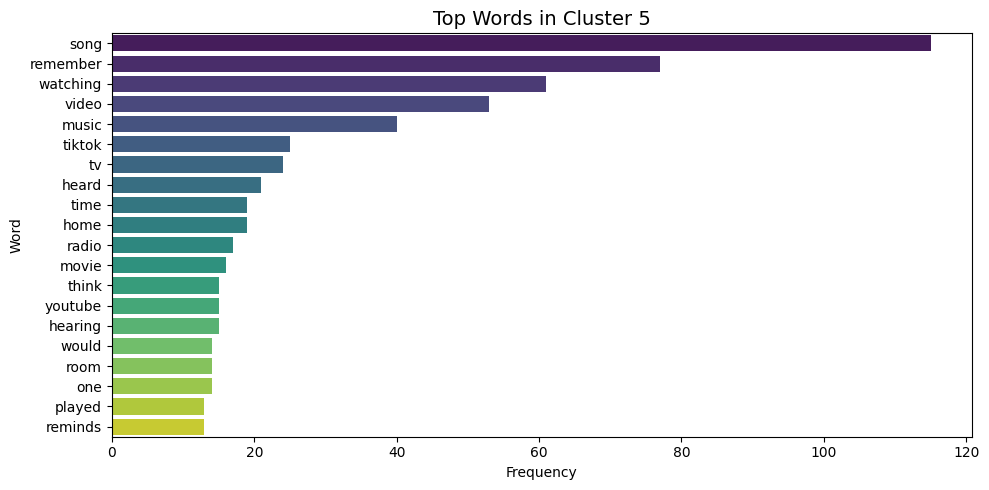

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


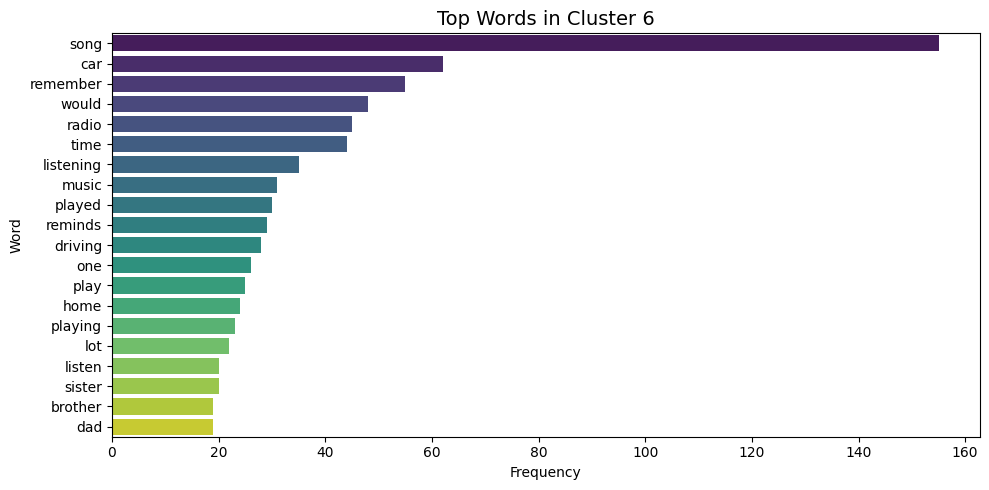

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


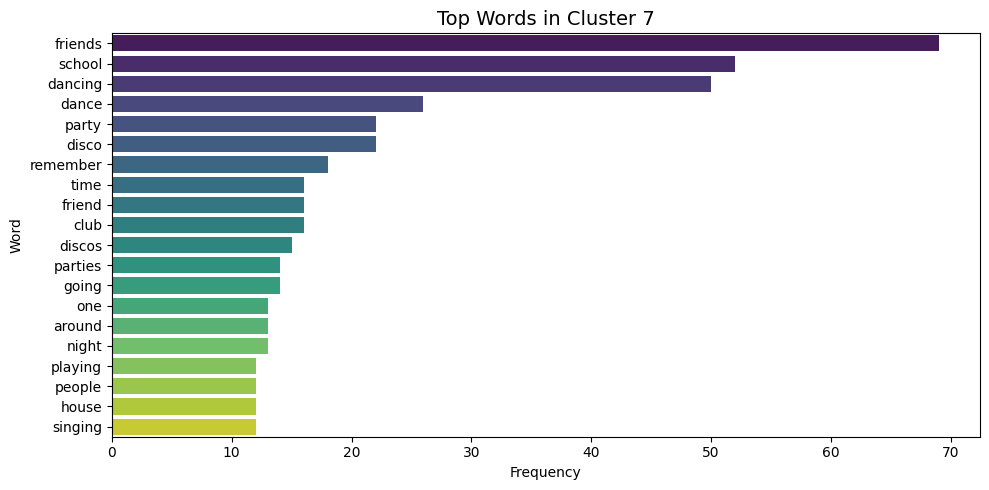

C:\Users\james\AppData\Local\Temp\ipykernel_17164\1659094750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="viridis")


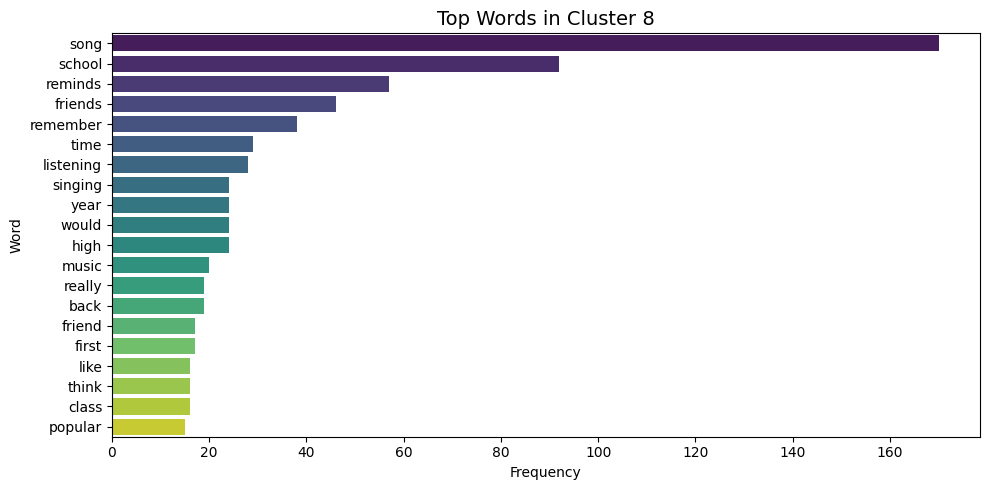

In [11]:
import os

# Create output directory for plots
output_dir = "cluster_keyword_plots"
os.makedirs(output_dir, exist_ok=True)

# Plot and save top words per cluster
for cluster_id, word_freqs in top_words.items():
    words, freqs = zip(*word_freqs)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(freqs), y=list(words), palette="viridis")
    plt.title(f"Top Words in Cluster {cluster_id}", fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()

    # Save plot
    filename = f"{output_dir}/cluster_{cluster_id}_keywords.png"
    plt.savefig(filename, dpi=300)

    # Also display in notebook
    plt.show()

    

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


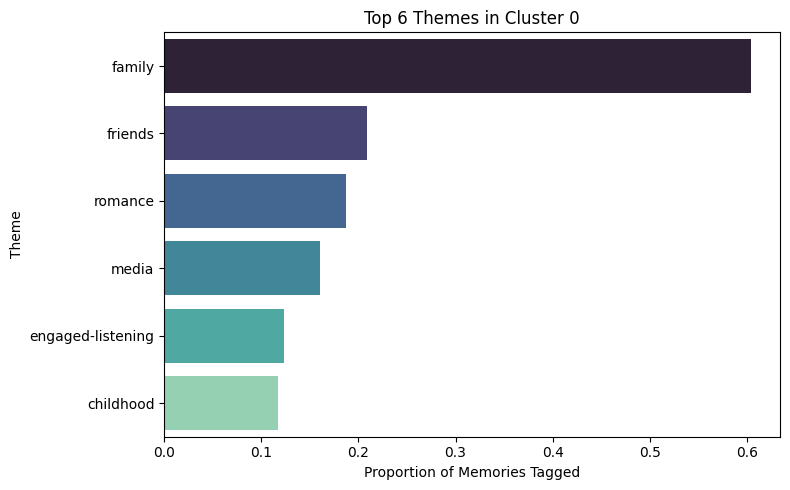

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


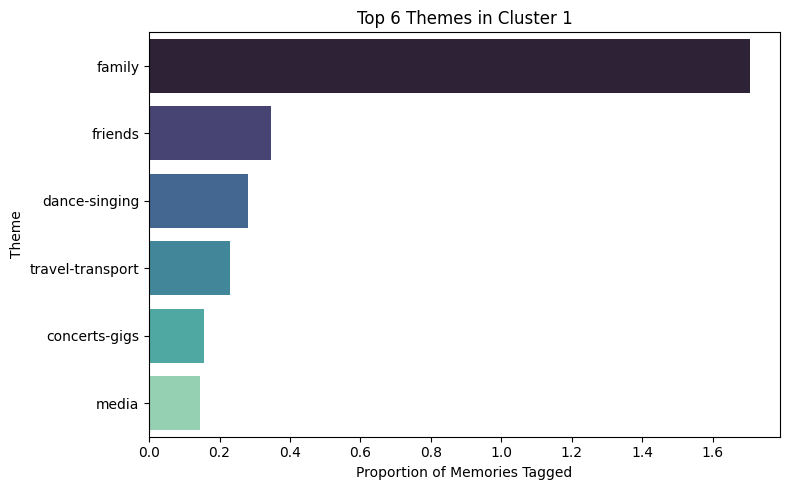

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


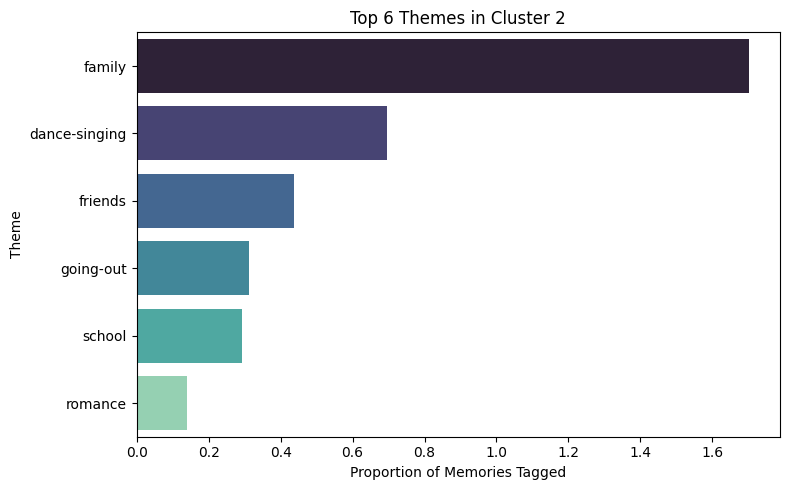

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


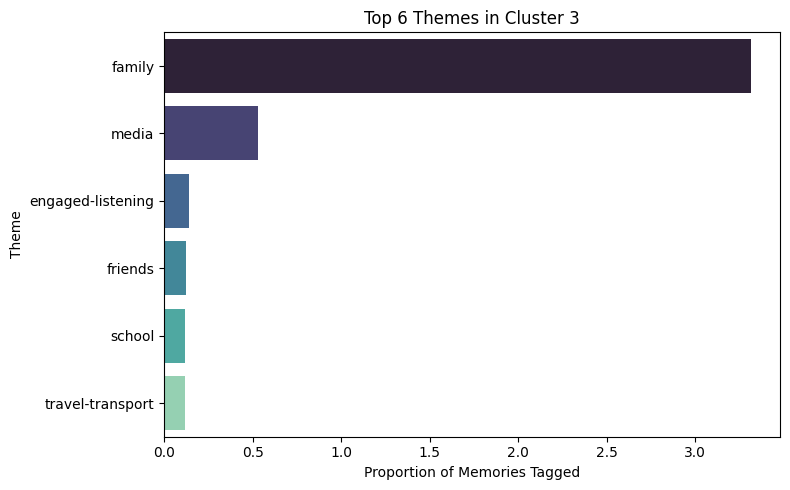

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


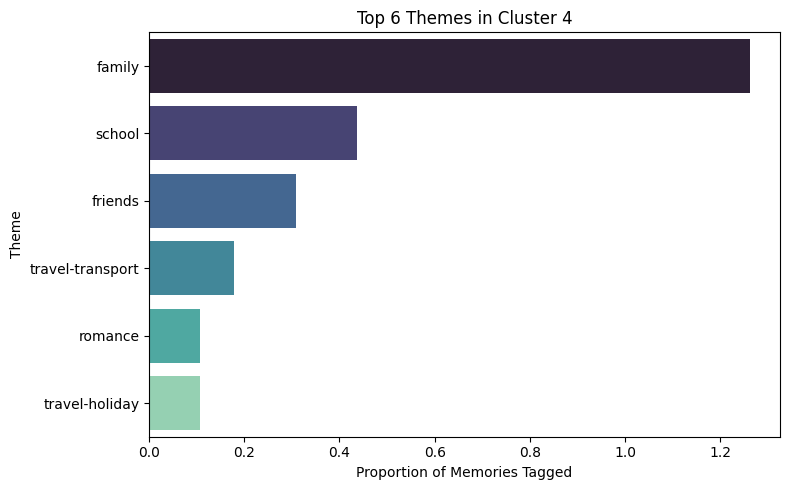

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


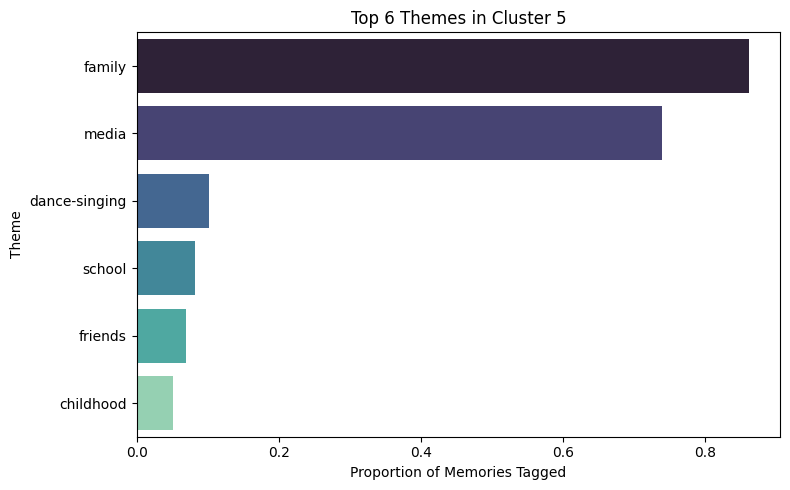

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


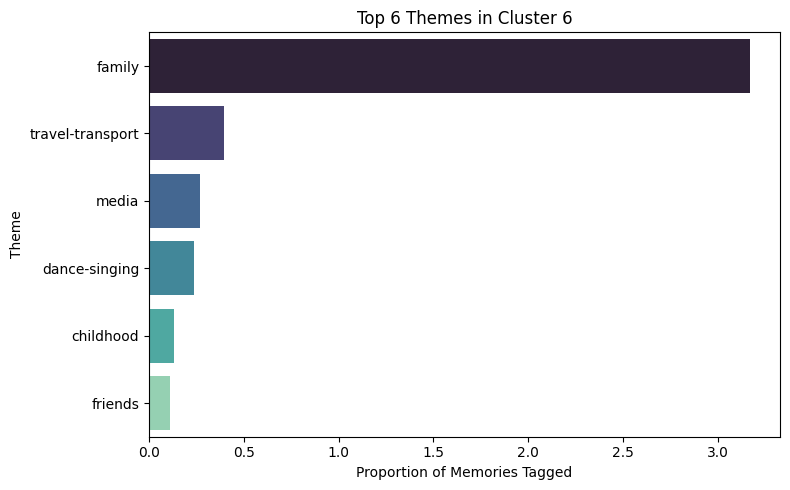

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


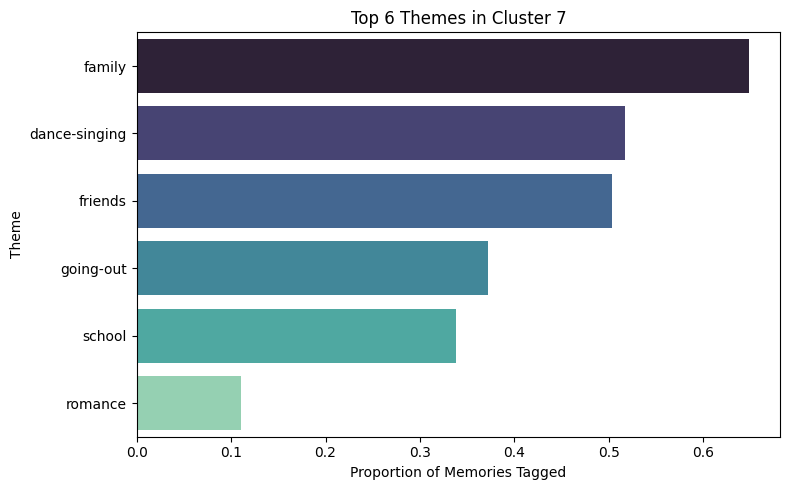

C:\Users\james\AppData\Local\Temp\ipykernel_17164\2474299659.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")


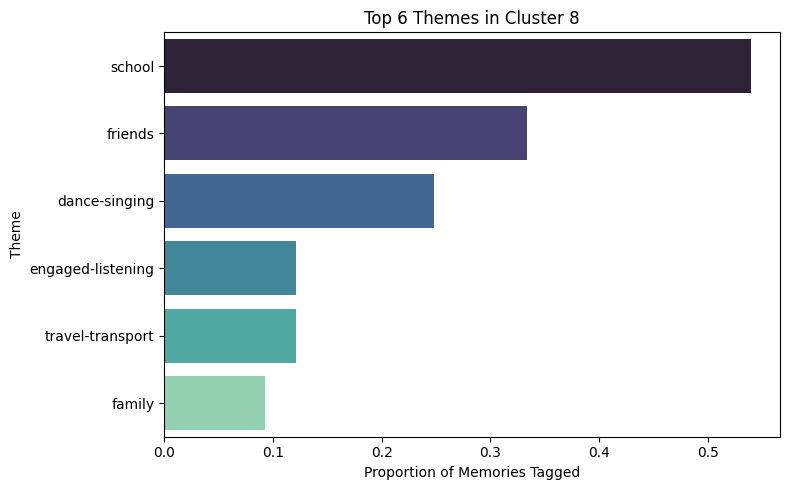

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = "theme_barplots_by_cluster"
os.makedirs(output_dir, exist_ok=True)

# Load the two datasets
df_clusters = pd.read_csv("C:/Users/james/Downloads/diss/data/SBERT/KMeans_clustered_descriptions.csv")
df_themes = pd.read_csv("C:/Users/james/Downloads/diss/data/MEAMdata_cleaned.csv")  # adjust path if needed

# Manually specify the theme columns
theme_cols = [
    "media", "concerts-gigs", "going-out", "dance-singing", "romance", "friends",
    "family", "childhood", "school", "life-transitions", "grief-loss", "mixed-emotions",
    "engaged-listening", "first-music-exp", "travel-transport", "travel-holiday"
]

# Merge the dataframes by index (if rows align 1:1)
df_themes["kmeans_cluster"] = df_clusters["kmeans_cluster"]

# Check if all themes are present
missing = [col for col in theme_cols if col not in df_themes.columns]
if missing:
    print("Missing theme columns:", missing)

# Calculate theme prevalence per cluster
theme_summary = df_themes.groupby("kmeans_cluster")[theme_cols].mean().T

# Plot: top N themes per cluster
TOP_N = 6
output_dir = "theme_barplots_by_cluster"
os.makedirs(output_dir, exist_ok=True)

for cluster_id in theme_summary.columns:
    theme_data = theme_summary[cluster_id].sort_values(ascending=False).head(TOP_N)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=theme_data.values, y=theme_data.index, palette="mako")
    plt.title(f"Top {TOP_N} Themes in Cluster {cluster_id}")
    plt.xlabel("Proportion of Memories Tagged")
    plt.ylabel("Theme")
    plt.tight_layout()
    
    # Save and show
    plt.savefig(f"{output_dir}/cluster_{cluster_id}_themes.png", dpi=300)
    plt.show()


In [13]:
import pandas as pd

# Load your main MEAM dataset
df_main = pd.read_csv(r"C:\Users\james\Downloads\diss\data\MEAMdata_cleaned.csv")

# Load cluster assignments
df_cluster = pd.read_csv(r"C:\Users\james\Downloads\diss\output\MEAM_kmeans_clustered.csv")

# Add kmeans_cluster column back into df_main
df_main['kmeans_cluster'] = df_cluster['kmeans_cluster']

# Check it worked
print(df_main[['kmeans_cluster']].head())



   kmeans_cluster
0               6
1               8
2               8
3               8
4               8


In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import os

# === 1. Load your SBERT embeddings ===
embed_path = r"C:\Users\james\Downloads\diss\data\SBERT-L6-v2_embed.csv"

# Load embeddings from CSV
embed_df = pd.read_csv(embed_path)

# Convert to numpy array
embeddings = embed_df.to_numpy()

# === 2. Check alignment ===
assert embeddings.shape[0] == len(df_main), "Embeddings and memories must match!"

# === 3. Create output directory ===
output_dir = 'cluster_narrative_prototypes'
os.makedirs(output_dir, exist_ok=True)

# === 4. Extraction settings ===
n_top = 5  # Number of most central memories to extract per cluster

# === 5. Loop over clusters ===
for cluster_label in sorted(df_main['kmeans_cluster'].unique()):
    
    # Get indices of memories in this cluster
    cluster_indices = df_main[df_main['kmeans_cluster'] == cluster_label].index
    
    # Get embeddings of these memories
    cluster_embeddings = embeddings[cluster_indices]
    
    # Calculate the centroid (mean embedding)
    centroid = cluster_embeddings.mean(axis=0).reshape(1, -1)
    
    # Calculate cosine similarity to centroid
    similarities = cosine_similarity(cluster_embeddings, centroid).flatten()
    
    # Rank memories by similarity (highest = most central)
    top_indices = cluster_indices[np.argsort(similarities)[-n_top:][::-1]]  # descending order
    
    # Extract corresponding memory descriptions
    top_memories = df_main.loc[top_indices, 'description']  # <-- Replace 'memorytext' with your actual text column name
    
    # Save results to a text file
    output_path = os.path.join(output_dir, f'cluster_{cluster_label}_top_{n_top}_memories.txt')
    with open(output_path, 'w', encoding='utf-8') as f:
        for i, memory in enumerate(top_memories):
            f.write(f"Memory {i+1} (Similarity: {similarities[np.argsort(similarities)[-n_top:][::-1]][i]:.4f})\n")
            f.write(memory.strip() + '\n\n')

print("✅ Narrative prototypes extracted successfully!")


✅ Narrative prototypes extracted successfully!
